#####Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing

#####Importing Data

In [3]:
# Data From https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data
df = pd.read_csv('C:/applications/ML Project/model_training_files/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Data Notes:
- cp = chest pain type
- trestbps = resting blood pressure
- chol = cholesterol measures
- fbs = fasting blood sugar
- restecg = ecg observation at resting condition
- thalch = max heart rate achieved
- exang = excercise induced angina
- oldpeak = st depression induced by exercise relative to rest
- slope = the slope of the peak exercise ST segment
- ca = number of major vessels (0-3) colored by flourosopy
- thal = thal
- num = target

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
# Drop kolom ID, lokasi dataset, fbs
df = df.drop(columns='id', axis=1)
df = df.drop(columns='dataset', axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
# Menunjukkan data null
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [7]:
# Menghapus data null
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    object 
 2   cp        299 non-null    object 
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    object 
 6   restecg   299 non-null    object 
 7   thalch    299 non-null    float64
 8   exang     299 non-null    object 
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    object 
 11  ca        299 non-null    float64
 12  thal      299 non-null    object 
 13  num       299 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 35.0+ KB


In [10]:
# Rename kolom num sebagai target
df.rename(columns = {'num':'target'}, inplace = True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,68,Male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,2
300,57,Male,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect,3
301,57,Female,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,flat,1.0,normal,1
508,47,Male,asymptomatic,150.0,226.0,False,normal,98.0,True,1.5,flat,0.0,reversable defect,1


#####Data Exploration/Visualisation

(array([ 23.,   0.,   0., 144.,   0.,   0.,  83.,   0.,   0.,  49.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

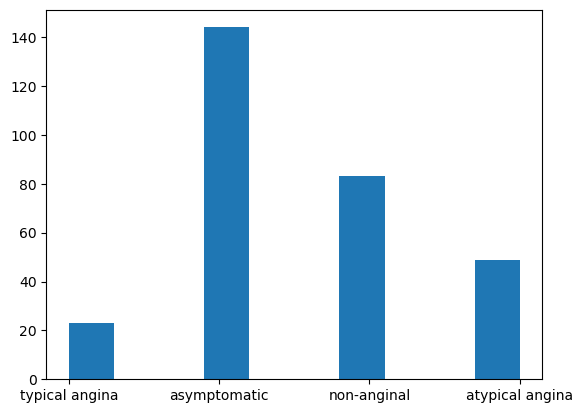

In [11]:
plt.hist(df['cp'])

(array([203.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  96.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

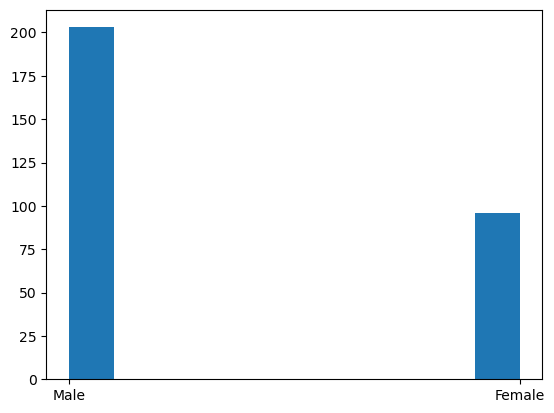

In [12]:
plt.hist(df['sex'])

(array([146.,   0.,   0.,   0.,   0., 149.,   0.,   0.,   0.,   4.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

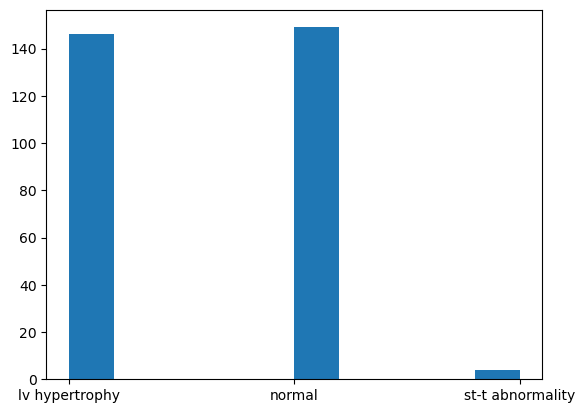

In [13]:
plt.hist(df['restecg'])

(array([ 21.,   0.,   0.,   0.,   0., 139.,   0.,   0.,   0., 139.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

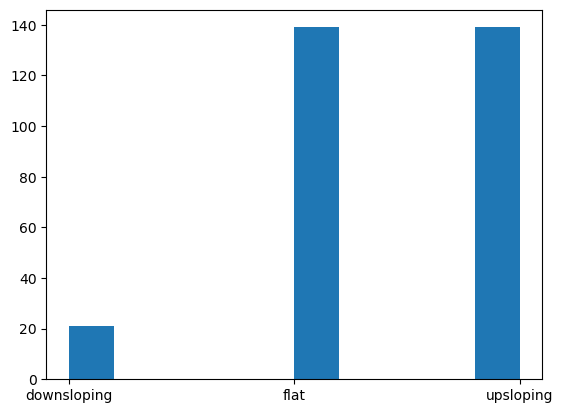

In [14]:
plt.hist(df['slope'])

(array([ 18.,   0.,   0.,   0.,   0., 164.,   0.,   0.,   0., 117.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

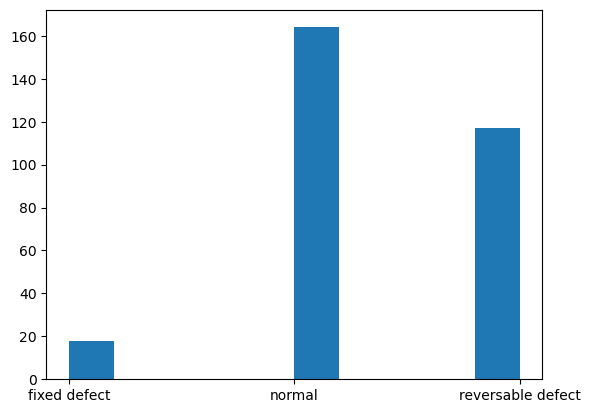

In [15]:
plt.hist(df['thal'])

#####Feature Selection and Engineering

In [16]:
df['exang'] = df['exang'].replace({True: 1, False: 0})
df['fbs'] = df['fbs'].replace({True: 1, False: 0})

C:\Users\keman\AppData\Local\Temp\ipykernel_7820\3283211406.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].replace({True: 1, False: 0})
C:\Users\keman\AppData\Local\Temp\ipykernel_7820\3283211406.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'] = df['fbs'].replace({True: 1, False: 0})


(array([160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 139.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

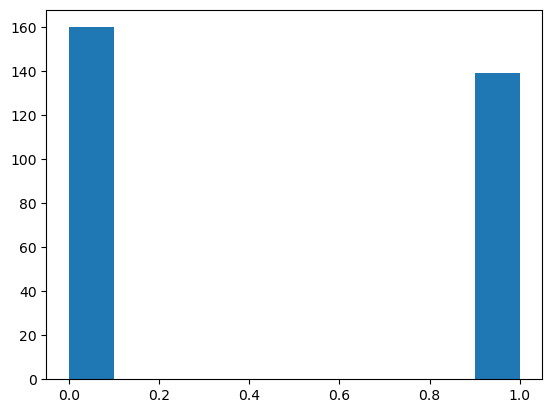

In [17]:
df['target'] = df['target'].replace({1: 1, 2: 1, 3:1, 4:1})
plt.hist(df['target'])

In [18]:
# One-hot encoding
pd = pd.get_dummies(df, drop_first=False, dtype=int)
pd.head()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,target,sex_Female,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145.0,233.0,1,150.0,0,2.3,0.0,0,0,...,1,1,0,0,1,0,0,1,0,0
1,67,160.0,286.0,0,108.0,1,1.5,3.0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,67,120.0,229.0,0,129.0,1,2.6,2.0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,37,130.0,250.0,0,187.0,0,3.5,0.0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,41,130.0,204.0,0,172.0,0,1.4,0.0,0,1,...,0,1,0,0,0,0,1,0,1,0


In [19]:
pd.drop('restecg_normal', axis=1, inplace=True)
pd.drop('thal_normal', axis=1, inplace=True)
pd.drop('cp_asymptomatic', axis=1, inplace=True)
pd

,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,target,sex_Female,...,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_reversable defect
0,63,145.0,233.0,1,150.0,0,2.3,0.0,0,0,...,0,0,1,1,0,1,0,0,1,0
1,67,160.0,286.0,0,108.0,1,1.5,3.0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,67,120.0,229.0,0,129.0,1,2.6,2.0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,37,130.0,250.0,0,187.0,0,3.5,0.0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,41,130.0,204.0,0,172.0,0,1.4,0.0,0,1,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,68,144.0,193.0,1,141.0,0,3.4,2.0,1,0,...,0,0,0,0,0,0,1,0,0,1
300,57,130.0,131.0,0,115.0,1,1.2,1.0,1,0,...,0,0,0,0,0,0,1,0,0,1
301,57,130.0,236.0,0,174.0,0,0.0,1.0,1,1,...,1,0,0,1,0,0,1,0,0,0
508,47,150.0,226.0,0,98.0,1,1.5,0.0,1,0,...,0,0,0,0,0,0,1,0,0,1


##### Splitting Data

In [20]:
X = pd.drop('target', axis=1)
X

,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,sex_Female,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_reversable defect
0,63,145.0,233.0,1,150.0,0,2.3,0.0,0,1,0,0,1,1,0,1,0,0,1,0
1,67,160.0,286.0,0,108.0,1,1.5,3.0,0,1,0,0,0,1,0,0,1,0,0,0
2,67,120.0,229.0,0,129.0,1,2.6,2.0,0,1,0,0,0,1,0,0,1,0,0,1
3,37,130.0,250.0,0,187.0,0,3.5,0.0,0,1,0,1,0,0,0,1,0,0,0,0
4,41,130.0,204.0,0,172.0,0,1.4,0.0,1,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,68,144.0,193.0,1,141.0,0,3.4,2.0,0,1,0,0,0,0,0,0,1,0,0,1
300,57,130.0,131.0,0,115.0,1,1.2,1.0,0,1,0,0,0,0,0,0,1,0,0,1
301,57,130.0,236.0,0,174.0,0,0.0,1.0,1,0,1,0,0,1,0,0,1,0,0,0
508,47,150.0,226.0,0,98.0,1,1.5,0.0,0,1,0,0,0,0,0,0,1,0,0,1


In [21]:
y = pd['target']
y

0      0
1      1
2      1
3      0
4      0
      ..
299    1
300    1
301    1
508    1
748    1
Name: target, Length: 299, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#####Model Training

In [23]:
model = RandomForestClassifier(max_depth=5)
# model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

#####Model Evaluation

In [24]:
train_data_pred = model.predict(X_train)
train_data_accuracy = accuracy_score(y_train, train_data_pred)
print("Train data accuracy: ",train_data_accuracy)

Train data accuracy:  0.9414225941422594


In [25]:
print(classification_report(y_train,train_data_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       131
           1       0.97      0.90      0.93       108

    accuracy                           0.94       239
   macro avg       0.95      0.94      0.94       239
weighted avg       0.94      0.94      0.94       239



In [26]:
test_data_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, test_data_pred)
print("Test data accuracy: ",test_data_accuracy)

Test data accuracy:  0.8


In [27]:
print(classification_report(y_test,test_data_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.71      0.79        31

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



In [28]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [29]:
model = pickle.load(open('model.pkl', 'rb'))
print(model.predict(X_test))

[0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1]
